### Use this notebook for downloading tweets, adding sentiments, cleaning and engineering the data and combining it with stock data

http://followthehashtag.com/datasets/nasdaq-100-companies-free-twitter-dataset/ <br>
https://github.com/cjhutto/vaderSentiment

In [2]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import datetime as dt
from sklearn.preprocessing import StandardScaler
import pandas_datareader.data as web
import math
import xlsxwriter
import os

### In the cell below, for each new stock change file- and stockname and run all cells below
Tweets for training were downloaded from the followthehashtag.com -website and saved ticker wise in the folder named Tweet.

In [3]:
xls = pd.ExcelFile('C:/Users/jangn/OneDrive/CODE/Stock_markets/Tweets/AAL.xlsx') # CHANGE FILE NAME!!!

stock = "AAL" #CHANGE STOCK TICKER!!!

In [4]:
df = pd.read_excel(xls, header = 0,encoding='latin-1', sheet_name = "Stream")

df.head()

,Tweet Id,Date,Hour,User Name,Nickname,Bio,Tweet content,Favs,RTs,Latitude,...,Listed,Tweet language (ISO 639-1),Tweet Url,Is a RT,Original Tweet User Name,User Mentions,Hashtags,Symbols,Media,URLs
0,743011665663295491,2016-06-15,09:26,Scutify,scutify,Scuttlebutt + Finance = Scutify. The most inno...,"Why American Airlines Group Inc $AAL, Novo Nor...",NaN,NaN,NaN,...,109.0,en,http://www.twitter.com/scutify/status/74301166...,False,NaN,NaN,NaN,"$AAL,$NVO,$SYF",NaN,https://www.scutify.com/articles/2016-06-15-wh...
1,742994700563558400,2016-06-15,08:18,Halifax ShareDealing,halifaxbroker,Authorised and regulated by the Financial Cond...,Yesterday's top #FTSE100 fallers - Anglo Ameri...,NaN,NaN,53.79648,...,43.0,en,http://www.twitter.com/halifaxbroker/status/74...,False,NaN,NaN,#FTSE100,"$AAL,$ANTO,$SKY,$BKG,$BLT",NaN,NaN
2,742991573181423618,2016-06-15,08:06,TradeWithSuper,TradeWithSuper,The Twitter handle 4 @TopFiveTraders that foll...,SA_QuickIdeas: 5 Large-Cap Stocks With The Low...,NaN,NaN,NaN,...,110.0,en,http://www.twitter.com/TradeWithSuper/status/7...,False,NaN,NaN,NaN,"$AAL,$DAL,$HPQ,$TTM,$UAL,$VLO",NaN,http://seekingalpha.com/article/3982103-5-larg...
3,742991250899513345,2016-06-15,08:04,WKRB News,WKRBNews,WKRB News - News and Analysis. http://t.co/n4Q...,JPMorgan Chase &amp; Co. Reiterates Underweigh...,NaN,NaN,NaN,...,124.0,de,http://www.twitter.com/WKRBNews/status/7429912...,False,NaN,NaN,NaN,$AAL,NaN,http://ift.tt/1UTFj1G
4,742990282380173313,2016-06-15,08:01,ProVesting,ProVesting,NaN,$DAL $AAL:\n\n5 Large-Cap Stocks With The Lowe...,NaN,NaN,NaN,...,140.0,en,http://www.twitter.com/ProVesting/status/74299...,False,NaN,NaN,NaN,"$DAL,$AAL",NaN,http://www.StockNewsWires.com/2016/06/15/dal-a...


### Add sentiment to each tweet using Vader
Extract the tweet content from each tweet and run the sentimentScore -function to get the sentiment for each.

In [5]:
Tweet = df['Tweet content']
Tweet.head()

0    Why American Airlines Group Inc $AAL, Novo Nor...
1    Yesterday's top #FTSE100 fallers - Anglo Ameri...
2    SA_QuickIdeas: 5 Large-Cap Stocks With The Low...
3    JPMorgan Chase &amp; Co. Reiterates Underweigh...
4    $DAL $AAL:\n\n5 Large-Cap Stocks With The Lowe...
Name: Tweet content, dtype: object

In [6]:
def sentimentScore(Tweet):
    analyzer = SentimentIntensityAnalyzer()
    results = []
    for sentence in Tweet:
        vs = analyzer.polarity_scores(sentence)
        print("Vader score: " + str(vs))
        #print("{: <65} {}".format(sentence, str(vs))) 
        #NOTE! I blocked the second print command so the sentences are
        #left out in the cell below, purely for clarity reasons
        results.append(vs)
    return results

In [7]:
df_results = pd.DataFrame(sentimentScore(Tweet))

Vader score: {'compound': -0.6249, 'neg': 0.186, 'pos': 0.0, 'neu': 0.814}
Vader score: {'compound': 0.2023, 'neg': 0.0, 'pos': 0.101, 'neu': 0.899}
Vader score: {'compound': -0.3818, 'neg': 0.157, 'pos': 0.0, 'neu': 0.843}
Vader score: {'compound': 0.0, 'neg': 0.0, 'pos': 0.0, 'neu': 1.0}
Vader score: {'compound': -0.3818, 'neg': 0.224, 'pos': 0.0, 'neu': 0.776}
Vader score: {'compound': 0.0, 'neg': 0.0, 'pos': 0.0, 'neu': 1.0}
Vader score: {'compound': -0.2732, 'neg': 0.139, 'pos': 0.0, 'neu': 0.861}
Vader score: {'compound': 0.0, 'neg': 0.0, 'pos': 0.0, 'neu': 1.0}
Vader score: {'compound': 0.0, 'neg': 0.0, 'pos': 0.0, 'neu': 1.0}
Vader score: {'compound': -0.5267, 'neg': 0.145, 'pos': 0.0, 'neu': 0.855}
Vader score: {'compound': -0.2732, 'neg': 0.104, 'pos': 0.0, 'neu': 0.896}
Vader score: {'compound': 0.0, 'neg': 0.0, 'pos': 0.0, 'neu': 1.0}
Vader score: {'compound': 0.2023, 'neg': 0.0, 'pos': 0.101, 'neu': 0.899}
Vader score: {'compound': -0.5563, 'neg': 0.217, 'pos': 0.0, 'neu':

### Combining the two dataframes
Next, combine the **df_tweets** dataframe with the **df_results** sentiment dataframe

In [8]:
df_tweets = pd.merge(df, df_results, left_index=True, right_index=True)

df_tweets.tail()

,Tweet Id,Date,Hour,User Name,Nickname,Bio,Tweet content,Favs,RTs,Latitude,...,Original Tweet User Name,User Mentions,Hashtags,Symbols,Media,URLs,compound,neg,neu,pos
6502,707914551908552705,2016-03-10,13:02,Brian D. Colwell,BColwell_EMGMKT,#EmergingMarkets #EmergingMarket #Africa #Asia...,#Cuba: U.S. #airlines vie 4 #latinamerica flig...,1.0,NaN,NaN,...,NaN,NaN,"#Cuba,#airlines,#latinamerica,#emergingmarket","$AAL,$DAL,$JBLU,$LUV,$UAL,$ALK,$VWO,$EEM,$FM,$ILF",NaN,http://ow.ly/Z1Nj0,0.0000,0.000,1.000,0.000
6503,707908040348016640,2016-03-10,12:36,Paul Henry,MoneyMarketzz,NaN,Our New Stock Pick Is On $PSNP &amp; It's Pick...,NaN,NaN,NaN,...,NaN,NaN,NaN,"$PSNP,$DROP,$AAL,$SVMI",NaN,http://tr.im/vUWIb,-0.1511,0.077,0.923,0.000
6504,707907421889495040,2016-03-10,12:34,Michael James,TheStockGuyz,NaN,Our Hot New Stock Alert Is $PSNP! Things Are R...,NaN,NaN,NaN,...,NaN,NaN,NaN,"$PSNP,$DROP,$AAL,$SVMI",NaN,http://bit.ly/1RSCiQy,0.7569,0.000,0.681,0.319
6505,707906875690512385,2016-03-10,12:32,Michael Cook,Stockfiendz,NaN,This Mineral Exploration Company Is Heating Up...,NaN,NaN,NaN,...,NaN,NaN,NaN,"$DROP,$AAL,$SVMI",NaN,http://goo.gl/ryjCm7,0.2942,0.000,0.891,0.109
6506,707859062738669569,2016-03-10,09:22,thepeople4stocks,thepeople4stoc1,NaN,AAL Exchange\nSee Here ---&gt; https://t.co/OT...,NaN,NaN,NaN,...,NaN,NaN,#tradeideas,"$AAL,$MITK,$ANTH",NaN,http://dlvr.it/Kl4HZh,0.0000,0.000,1.000,0.000


### Choose the common range for the dataframes to be used for all tweet data
Using range 1.4.-14.6.2016 = 73 days<br>
The tweet data did not cover a uniform time period. For some a longer perido was covered, for some a shorter one. All could fit within 73 days, though. 

In [9]:
df_tweets = df_tweets[(df_tweets['Date'] >= '2016-04-01') & (df_tweets['Date'] <= '2016-06-14')]

df_tweets.tail()

,Tweet Id,Date,Hour,User Name,Nickname,Bio,Tweet content,Favs,RTs,Latitude,...,Original Tweet User Name,User Mentions,Hashtags,Symbols,Media,URLs,compound,neg,neu,pos
5733,715721241710227457,2016-04-01,02:03,BreakingStocksNews,NewsToDesk,News about Stocks,$AAL:\n\nAmerican Airlines Group’s (AAL) “Outp...,NaN,NaN,NaN,...,NaN,NaN,NaN,$AAL,NaN,http://StockNewsHour.com/aal-american-airlines...,0.0000,0.0,1.000,0.000
5734,715717917606862850,2016-04-01,01:50,US Consumer News,ConsumerFeed,News for Consumers in a Changing World,American Airlines Group's outperform rating re...,NaN,NaN,NaN,...,NaN,NaN,#AAL,$AAL,NaN,http://ift.tt/1MFrvdE,0.3818,0.0,0.809,0.191
5735,715717224686813184,2016-04-01,01:47,China Invest,ChinaInvest,An investor in Hong Kong focusing in China sto...,RT SeekingAlpha: Airplane And Hospitality Indu...,1.0,1.0,NaN,...,NaN,NaN,NaN,"$HOT,$MAR,$JBLU,$DAL,$LUV,$AAL,$ALK",NaN,http://seekingalpha.com/article/3962425-airpla...,0.0000,0.0,1.000,0.000
5736,715716602730323968,2016-04-01,01:45,MarketBeatCom,RatingsNetwork,Formerly Analyst Ratings Network. http://t.co/...,American Airlines Group's outperform rating re...,NaN,1.0,NaN,...,NaN,NaN,#AAL,$AAL,NaN,http://ift.tt/1MFrvdE,0.3818,0.0,0.809,0.191
5737,715692661068468224,2016-04-01,00:10,Yamasuta,YamasutaTrader,Yamasuta is an algorithmic stock analysis soft...,"$AAL - BUY Signal at 41.38 on Mar 30, 16 By ht...",NaN,NaN,NaN,...,NaN,NaN,"#Stockmarket,#trading,#trade,#investing",$AAL,NaN,http://YaMasuta.com,0.0000,0.0,1.000,0.000


### Adding a datetime column/index
Next, removing the 'Date' column and adding a datetime column/index. This format is needed for the daily average calculations!

In [10]:
df_tweets['datetime'] = pd.to_datetime(df_tweets['Date']) # change of Date column to datetime columns
df_tweet_SA = df_tweets.set_index('datetime') # creates a new dataframe 'df_Dc' with the new index column datetime 
df_tweet_SA.drop(['Date'], axis=1, inplace=True) #drops the original 'Date' column from the dataframe
df_tweet_SA.head()

,Tweet Id,Hour,User Name,Nickname,Bio,Tweet content,Favs,RTs,Latitude,Longitude,...,Original Tweet User Name,User Mentions,Hashtags,Symbols,Media,URLs,compound,neg,neu,pos
datetime,,,,,,,,,,,,,,,,,,,,,
2016-06-14,742866928872476672,23:50,Airlines News,_airlines_,Track all of the latest Airlines News with Owl...,#AmericanAirlines Cabin Chaos Triggers Turbule...,NaN,NaN,NaN,NaN,...,NaN,NaN,#AmericanAirlines,$AAL,NaN,http://owler.us/aaQRCN,-0.5719,0.270,0.730,0.0
2016-06-14,742864743002574848,23:42,1 min Stock Insights,1MinuteStock,"Flash, 1 minute stock insights about trending ...",Explore #fundamental numbers and pros and cons...,NaN,NaN,NaN,NaN,...,NaN,NaN,#fundamental,$AAL,NaN,https://unicornbay.com/t/AAL.US?utm_medium=twe...,0.0000,0.000,1.000,0.0
2016-06-14,742862512878682112,23:33,dailystockplays.com,DailyStockPlays,"Live Day Trading Calls, Daily Swing Trading Li...",Expansion BD https://t.co/5WSaOfRETR $IMGN $CO...,NaN,NaN,37.25022,-119.75126,...,NaN,NaN,NaN,"$IMGN,$COF,$LYG,$STNG,$LUV,$ALLY,$SMFG,$ING,$M...",NaN,http://www.dailystockplays.com/Expansion-BD-20...,0.0000,0.000,1.000,0.0
2016-06-14,742856061606985728,23:07,Sarcasm Bot,sarcbot,Don't take this bot seriously. It was an exper...,$AAL big time shorts and options traders seem ...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,$AAL,NaN,NaN,0.0000,0.000,1.000,0.0
2016-06-14,742852413929836544,22:53,1 min Stock Insights,1MinuteStock,"Flash, 1 minute stock insights about trending ...",Wondering about risks of $AAL? The 21-day vola...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,$AAL,NaN,https://unicornbay.com/t/AAL.US?utm_medium=twe...,-0.2732,0.174,0.826,0.0


### Slimming down the stream into a dataframe with only relevant columns.

In [11]:
df_tweet_SA = df_tweets[['Date','Hour','Tweet content','Favs','RTs','Followers','Following', 'Is a RT', 
                'Hashtags','Symbols','compound','neg','neu','pos','datetime']]

df_tweet_SA.head()

,Date,Hour,Tweet content,Favs,RTs,Followers,Following,Is a RT,Hashtags,Symbols,compound,neg,neu,pos,datetime
17,2016-06-14,23:50,#AmericanAirlines Cabin Chaos Triggers Turbule...,NaN,NaN,31.0,3.0,False,#AmericanAirlines,$AAL,-0.5719,0.270,0.730,0.0,2016-06-14
18,2016-06-14,23:42,Explore #fundamental numbers and pros and cons...,NaN,NaN,1398.0,1495.0,False,#fundamental,$AAL,0.0000,0.000,1.000,0.0,2016-06-14
19,2016-06-14,23:33,Expansion BD https://t.co/5WSaOfRETR $IMGN $CO...,NaN,NaN,4864.0,2512.0,False,NaN,"$IMGN,$COF,$LYG,$STNG,$LUV,$ALLY,$SMFG,$ING,$M...",0.0000,0.000,1.000,0.0,2016-06-14
20,2016-06-14,23:07,$AAL big time shorts and options traders seem ...,NaN,NaN,163.0,6.0,False,NaN,$AAL,0.0000,0.000,1.000,0.0,2016-06-14
21,2016-06-14,22:53,Wondering about risks of $AAL? The 21-day vola...,NaN,NaN,1398.0,1495.0,False,NaN,$AAL,-0.2732,0.174,0.826,0.0,2016-06-14


### Remove tweets were compound is zero, i.e. sentiment is neutral
Neutral tweets do not reflect a positive or negative mood and serve therefore no purpose to this analysis. 

In [12]:
df_tweet_SA = df_tweet_SA[(df_tweet_SA[['compound']] != 0).all(axis=1)]

### Create new column with the 'compound' multiplied by nr of followers of the account
The logic being, if the tweeter has many followers, the compound of the his/her tweet has more significance compared to a tweet by a "less significant" tweeter, with less followers.

In [13]:
df_tweet_SA['Compound_multiplied'] = df_tweet_SA['compound']*df_tweet_SA['Followers']

In [14]:
df_tweet_SA.tail()


,Date,Hour,Tweet content,Favs,RTs,Followers,Following,Is a RT,Hashtags,Symbols,compound,neg,neu,pos,datetime,Compound_multiplied
5729,2016-04-01,02:08,RT @RatingsNetwork: American Airlines Group's ...,NaN,1.0,279.0,333.0,True,#AAL,$AAL,0.3818,0.0,0.833,0.167,2016-04-01,106.5222
5730,2016-04-01,02:07,Three Penny Stock Picks More Than QUADRUPLED I...,NaN,NaN,13805.0,8.0,False,NaN,"$DROP,$AAL,$SVMI",0.4003,0.0,0.870,0.130,2016-04-01,5526.1415
5732,2016-04-01,02:06,American Airlines Group’s $AAL “Outperform” Ra...,NaN,NaN,848.0,NaN,False,NaN,$AAL,0.3818,0.0,0.794,0.206,2016-04-01,323.7664
5734,2016-04-01,01:50,American Airlines Group's outperform rating re...,NaN,NaN,4519.0,2839.0,False,#AAL,$AAL,0.3818,0.0,0.809,0.191,2016-04-01,1725.3542
5736,2016-04-01,01:45,American Airlines Group's outperform rating re...,NaN,1.0,4001.0,1.0,False,#AAL,$AAL,0.3818,0.0,0.809,0.191,2016-04-01,1527.5818


### Remove rows where 'Followers' is NaN

In [15]:
nan_rows = df_tweet_SA[df_tweet_SA['Followers'].isnull()]
nan_rows

,Date,Hour,Tweet content,Favs,RTs,Followers,Following,Is a RT,Hashtags,Symbols,compound,neg,neu,pos,datetime,Compound_multiplied
1231,2016-05-27,23:25,Recap of HUGE Stock Market News today!\nhttps:...,NaN,NaN,NaN,NaN,False,NaN,"$A,$AAL,$ABT,$ABX,$AIG,$AMD,$AMZN,$B,$BA,$BABA...",0.5147,0.000,0.874,0.126,2016-05-27,NaN
2414,2016-05-06,18:44,Oversold Airline Ready For A Quick Rebound. $A...,NaN,NaN,NaN,5.0,False,NaN,$AAL,0.3612,0.000,0.737,0.263,2016-05-06,NaN
2712,2016-05-03,13:56,RT @stocktrader300: American Airlines $AAL at ...,NaN,1.0,NaN,NaN,True,NaN,$AAL,-0.2732,0.208,0.792,0.000,2016-05-03,NaN
4521,2016-04-13,09:06,Don't worry about $AAL @Free_Money_1 Giant Wed...,NaN,NaN,NaN,1.0,False,NaN,"$AAL,$ECEZ",0.3412,0.000,0.806,0.194,2016-04-13,NaN
4540,2016-04-13,05:54,@KleinschmidtJD Do not wait around!\nThe Symbo...,NaN,NaN,NaN,27.0,False,NaN,"$BHI,$AKRX,$AAL",-0.5216,0.206,0.794,0.000,2016-04-13,NaN
4558,2016-04-13,04:26,@eyesshare Stock Is Gonna Rock!\nY! Symbol ...,NaN,NaN,NaN,20.0,False,NaN,"$SPMO,$AAL,$IGLD",-0.4184,0.188,0.812,0.000,2016-04-13,NaN
4572,2016-04-13,03:26,@jorgecra72 A #wallstreet Buy Today!\nYahoo Fi...,1.0,1.0,NaN,NaN,False,#wallstreet,"$TSLA,$bdms,$AAL",-0.3595,0.161,0.839,0.000,2016-04-13,NaN
4575,2016-04-13,03:01,My old picks $AAL @Ruben___Quezada Breaking Pi...,NaN,NaN,NaN,NaN,False,NaN,$AAL,0.5859,0.000,0.774,0.226,2016-04-13,NaN
4587,2016-04-13,02:10,My old picks $AAL @dexterjaed Did you get your...,NaN,NaN,NaN,NaN,False,NaN,"$AAL,$ECEZ",0.2960,0.000,0.855,0.145,2016-04-13,NaN
4591,2016-04-13,02:02,No more buys $AAL @JAKEinTV Pump Incoming On E...,NaN,NaN,NaN,15.0,False,NaN,$AAL,-0.2960,0.196,0.804,0.000,2016-04-13,NaN


In [16]:
df_tweet_SA = df_tweet_SA[np.isfinite(df_tweet_SA['Followers'])]

### Scale the column "Compound_multiplied"
From the book "Hands-On machine Learning with Scikit-Learn & TensorFlow" by Aurélien Géron p. 66- : <br>
*If the aim is to validate the model alone, also test data can be scaled. In order to create a predictive algorithm only the train data should be scaled, not the test data. This is because in a predictive algorithm you need to be able to feed your model with new, unscaled data* <br>

For my model the input data will be the daily average of compound multiplied with number of followers

In [17]:
#from sklearn.preprocessing import StandardScaler
x_1 = df_tweet_SA[['Compound_multiplied']].values.astype(float)

scaler = StandardScaler().fit(x_1)

scaled_data = scaler.transform(x_1)

df_tweet_SA['Compound_multiplied_scaled'] = scaled_data

df_tweet_SA.tail()
len(df_tweet_SA)

2460

### Create a dataframe with daily MEANS of each column 


In [18]:
df_daily_mean=(df_tweet_SA.groupby(df_tweet_SA.datetime).mean())

df_daily_mean.tail()

,Favs,RTs,Followers,Following,Is a RT,compound,neg,neu,pos,Compound_multiplied,Compound_multiplied_scaled
datetime,,,,,,,,,,,
2016-06-10,2.000000,2.333333,1193.150000,447.172414,0.050000,0.349055,0.038217,0.784050,0.177733,556.882918,0.025694
2016-06-11,NaN,1.000000,429.285714,509.666667,0.142857,0.267514,0.029429,0.839143,0.131429,134.118771,0.013655
2016-06-12,NaN,NaN,2011.500000,17.500000,0.000000,0.447250,0.000000,0.695500,0.304500,862.483700,0.034397
2016-06-13,2.333333,12.428571,9949.040000,583.602740,0.240000,0.175157,0.063747,0.792840,0.143413,-2427.858701,-0.059304
2016-06-14,1.933333,5.611111,11960.423529,2060.790123,0.141176,-0.154785,0.144682,0.767647,0.087659,-6435.660252,-0.173436


In [19]:
len(df_daily_mean)

75

## Downloading stock data from Yahoo Finance

In [20]:
#import pandas_datareader.data as web

start = dt.datetime(2016, 4, 2)
end =  dt.datetime(2016, 6, 14) #dt.datetime.now() 

df_stock = web.DataReader(stock, 'yahoo', start, end)

In [21]:
df_stock.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-04-01,40.160000,39.270000,40.130001,39.520000,11244100.0,38.377888
2016-04-04,40.240002,39.150002,39.810001,39.369999,7831200.0,38.232220
2016-04-05,39.380001,38.740002,39.130001,38.930000,7648400.0,37.804943
2016-04-06,39.070000,38.340000,39.070000,38.900002,5645500.0,37.775810
2016-04-07,39.049999,37.910000,38.660000,38.360001,8206700.0,37.251411


### Rename columns to avoid mixup with possible other data

In [22]:
df_stock.columns = ['High','Low','Open','Close','Volume_stock','Adj_Close_stock']

### New column for crude measure of volatility - stock (not used in the model)
The % spread based on the closing price

In [23]:
df_stock['HiLo_vola_stock'] = (df_stock['High'] - df_stock['Low']) / df_stock['Adj_Close_stock'] * 100.0

### New column for daily percent change - stock

In [24]:
df_stock['Pct_change_stock'] = (df_stock['Close'] - df_stock['Open']) / df_stock['Open'] * 100.0

### New column for daily percent change scaled - stock

In [25]:
stock_1 = df_stock[['Pct_change_stock']].values.astype(float)

scaler = StandardScaler().fit(stock_1)

scaled_data = scaler.transform(stock_1)

df_stock['Pct_change_stock_scaled'] = scaled_data

df_stock.tail()

,High,Low,Open,Close,Volume_stock,Adj_Close_stock,HiLo_vola_stock,Pct_change_stock,Pct_change_stock_scaled
Date,,,,,,,,,
2016-06-08,32.970001,32.220001,32.630001,32.509998,8173100.0,31.661747,2.368789,-0.367768,0.067311
2016-06-09,33.580002,32.250000,32.250000,33.400002,8188300.0,32.528526,4.088725,3.565896,2.305596
2016-06-10,33.480000,32.639999,32.799999,33.139999,8252300.0,32.275303,2.602610,1.036586,0.866399
2016-06-13,32.990002,31.639999,32.990002,31.799999,9225600.0,30.970270,4.359027,-3.607161,-1.775928
2016-06-14,31.969999,30.020000,31.809999,30.360001,13802900.0,29.567841,6.594999,-4.558311,-2.317140


In [26]:
df_stock.tail()

,High,Low,Open,Close,Volume_stock,Adj_Close_stock,HiLo_vola_stock,Pct_change_stock,Pct_change_stock_scaled
Date,,,,,,,,,
2016-06-08,32.970001,32.220001,32.630001,32.509998,8173100.0,31.661747,2.368789,-0.367768,0.067311
2016-06-09,33.580002,32.250000,32.250000,33.400002,8188300.0,32.528526,4.088725,3.565896,2.305596
2016-06-10,33.480000,32.639999,32.799999,33.139999,8252300.0,32.275303,2.602610,1.036586,0.866399
2016-06-13,32.990002,31.639999,32.990002,31.799999,9225600.0,30.970270,4.359027,-3.607161,-1.775928
2016-06-14,31.969999,30.020000,31.809999,30.360001,13802900.0,29.567841,6.594999,-4.558311,-2.317140


### Combine the tweet sentiment dataframe with the stock data dataframe

In [27]:
df_full = pd.concat([df_stock[['Volume_stock','Adj_Close_stock','HiLo_vola_stock','Pct_change_stock', 'Pct_change_stock_scaled']],\
                     df_daily_mean], axis=1, sort=False)
df_full.tail()

,Volume_stock,Adj_Close_stock,HiLo_vola_stock,Pct_change_stock,Pct_change_stock_scaled,Favs,RTs,Followers,Following,Is a RT,compound,neg,neu,pos,Compound_multiplied,Compound_multiplied_scaled
2016-06-10,8252300.0,32.275303,2.602610,1.036586,0.866399,2.000000,2.333333,1193.150000,447.172414,0.050000,0.349055,0.038217,0.784050,0.177733,556.882918,0.025694
2016-06-11,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,429.285714,509.666667,0.142857,0.267514,0.029429,0.839143,0.131429,134.118771,0.013655
2016-06-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011.500000,17.500000,0.000000,0.447250,0.000000,0.695500,0.304500,862.483700,0.034397
2016-06-13,9225600.0,30.970270,4.359027,-3.607161,-1.775928,2.333333,12.428571,9949.040000,583.602740,0.240000,0.175157,0.063747,0.792840,0.143413,-2427.858701,-0.059304
2016-06-14,13802900.0,29.567841,6.594999,-4.558311,-2.317140,1.933333,5.611111,11960.423529,2060.790123,0.141176,-0.154785,0.144682,0.767647,0.087659,-6435.660252,-0.173436


### Impute missing data with their means
For some of the cashtag twitter data entire days were missing. For example, for $AMZN there were no tweets in the data at all for three days; 8.-10.6.

Mean imputation replaces missing values with the mean value of that feature/variable. Mean imputation is one of the most ‘naive’ imputation methods because unlike more complex methods like k-nearest neighbors imputation, it does not use the information we have about an observation to estimate a value for it.

It's not pretty, it's not fully accurate, but better than removing these days altogether. Besides, there might be other missing days for the other cashtag tweets and this cell fixes them all.

In [28]:
df_full['Favs'].fillna(df_full['Favs'].mean(), inplace=True)
df_full['RTs'].fillna(df_full['RTs'].mean(), inplace=True)
df_full['Followers'].fillna(df_full['Followers'].mean(), inplace=True)
df_full['Following'].fillna(df_full['Following'].mean(), inplace=True)
df_full['Is a RT'].fillna(df_full['Is a RT'].mean(), inplace=True)
df_full['compound'].fillna(df_full['compound'].mean(), inplace=True)
df_full['neg'].fillna(df_full['neg'].mean(), inplace=True)
df_full['neu'].fillna(df_full['neu'].mean(), inplace=True)
df_full['pos'].fillna(df_full['pos'].mean(), inplace=True)
df_full['Compound_multiplied'].fillna(df_full['Compound_multiplied'].mean(), inplace=True)
df_full['Compound_multiplied_scaled'].fillna(df_full['Compound_multiplied_scaled'].mean(), inplace=True)

df_full.tail()

,Volume_stock,Adj_Close_stock,HiLo_vola_stock,Pct_change_stock,Pct_change_stock_scaled,Favs,RTs,Followers,Following,Is a RT,compound,neg,neu,pos,Compound_multiplied,Compound_multiplied_scaled
2016-06-10,8252300.0,32.275303,2.602610,1.036586,0.866399,2.000000,2.333333,1193.150000,447.172414,0.050000,0.349055,0.038217,0.784050,0.177733,556.882918,0.025694
2016-06-11,NaN,NaN,NaN,NaN,NaN,1.874387,1.000000,429.285714,509.666667,0.142857,0.267514,0.029429,0.839143,0.131429,134.118771,0.013655
2016-06-12,NaN,NaN,NaN,NaN,NaN,1.874387,2.406089,2011.500000,17.500000,0.000000,0.447250,0.000000,0.695500,0.304500,862.483700,0.034397
2016-06-13,9225600.0,30.970270,4.359027,-3.607161,-1.775928,2.333333,12.428571,9949.040000,583.602740,0.240000,0.175157,0.063747,0.792840,0.143413,-2427.858701,-0.059304
2016-06-14,13802900.0,29.567841,6.594999,-4.558311,-2.317140,1.933333,5.611111,11960.423529,2060.790123,0.141176,-0.154785,0.144682,0.767647,0.087659,-6435.660252,-0.173436


### Interpolate for missing weekend stock data!
NOTE! Last date 2016-06-14 has no values (=NaN) for 'Predicted_change_stock' or 'Buy/Sell'.

In [36]:
df_full[[ "Volume_stock", "Adj_Close_stock", "HiLo_vola_stock", "Pct_change_stock", "Pct_change_stock_scaled"]] = \
df_full[[ "Volume_stock", "Adj_Close_stock", "HiLo_vola_stock", "Pct_change_stock", "Pct_change_stock_scaled"]] \
.interpolate(method='linear', limit_direction='forward', axis=0)

In [37]:
df_full.tail(11)

,Volume_stock,Adj_Close_stock,HiLo_vola_stock,Pct_change_stock,Pct_change_stock_scaled,Favs,RTs,Followers,Following,Is a RT,compound,neg,neu,pos,Compound_multiplied,Compound_multiplied_scaled,Predicted_change_stock
2016-06-04,1.106120e+07,30.152184,3.740079,-1.115272,-0.358024,2.000000,2.857143,11748.400000,8271.600000,0.600000,0.164890,0.048700,0.859800,0.091500,1890.126790,0.063662,NaN
2016-06-05,9.698300e+06,30.298271,3.380993,0.238594,0.412336,1.000000,1.000000,3343.833333,2301.000000,0.083333,0.071350,0.082583,0.802833,0.114583,-494.569925,-0.004249,1.592459
2016-06-06,8.335400e+06,30.444357,3.021907,1.592459,1.182696,1.400000,1.272727,1925.260000,1165.224490,0.120000,0.072122,0.098120,0.769640,0.132240,-40.725044,0.008676,2.860781
2016-06-07,1.242420e+07,31.515663,5.616250,2.860781,1.904380,2.600000,5.631579,37904.563380,1758.200000,0.183099,0.215059,0.055380,0.785408,0.159197,-24255.853656,-0.680912,-0.367768
2016-06-08,8.173100e+06,31.661747,2.368789,-0.367768,0.067311,1.400000,4.333333,1591.153846,1270.800000,0.076923,0.108962,0.072923,0.796000,0.131077,385.432088,0.020812,3.565896
2016-06-09,8.188300e+06,32.528526,4.088725,3.565896,2.305596,1.750000,3.000000,1086.266667,879.620690,0.200000,0.297437,0.041367,0.779367,0.179300,247.009377,0.016870,1.036586
2016-06-10,8.252300e+06,32.275303,2.602610,1.036586,0.866399,2.000000,2.333333,1193.150000,447.172414,0.050000,0.349055,0.038217,0.784050,0.177733,556.882918,0.025694,NaN
2016-06-11,8.576733e+06,31.840292,3.188082,-0.511330,-0.014376,1.874387,1.000000,429.285714,509.666667,0.142857,0.267514,0.029429,0.839143,0.131429,134.118771,0.013655,NaN
2016-06-12,8.901167e+06,31.405281,3.773554,-2.059245,-0.895152,1.874387,2.406089,2011.500000,17.500000,0.000000,0.447250,0.000000,0.695500,0.304500,862.483700,0.034397,-3.607161
2016-06-13,9.225600e+06,30.970270,4.359027,-3.607161,-1.775928,2.333333,12.428571,9949.040000,583.602740,0.240000,0.175157,0.063747,0.792840,0.143413,-2427.858701,-0.059304,-4.558311


In [38]:
pd.DataFrame.describe(df_full)

,Volume_stock,Adj_Close_stock,HiLo_vola_stock,Pct_change_stock,Pct_change_stock_scaled,Favs,RTs,Followers,Following,Is a RT,compound,neg,neu,pos,Compound_multiplied,Compound_multiplied_scaled,Predicted_change_stock
count,7.500000e+01,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,51.000000
mean,9.785516e+06,33.938007,2.916282,-0.501903,-0.009012,1.874387,2.406089,4262.763227,1061.288181,0.136964,0.213484,0.056700,0.796477,0.146825,350.732342,0.019824,-0.465790
std,3.157759e+06,3.353530,1.081849,1.575422,0.896427,1.479771,1.807123,6218.179968,1176.784517,0.142211,0.137006,0.029326,0.036805,0.041124,3280.023130,0.093407,1.786157
min,5.018200e+06,29.567841,1.373308,-5.089362,-2.619312,1.000000,1.000000,28.000000,11.000000,0.000000,-0.154785,0.000000,0.695500,0.063667,-24255.853656,-0.680912,-5.089362
25%,7.359567e+06,31.083892,2.061459,-1.312659,-0.470339,1.000000,1.000000,1442.301923,397.994906,0.034483,0.119104,0.038337,0.780361,0.125411,109.081598,0.012942,-1.258754
50%,9.096200e+06,32.168182,2.781946,-0.435112,0.028992,1.500000,2.333333,2611.916667,734.230769,0.102041,0.214486,0.058314,0.796750,0.137263,397.263475,0.021149,-0.402718
75%,1.162440e+07,37.424595,3.622599,0.460723,0.538729,1.966667,2.641667,4674.610227,1411.933036,0.200000,0.268787,0.074167,0.816603,0.161040,1093.043631,0.040963,0.903489
max,2.093950e+07,40.145294,6.594999,3.565896,2.305596,10.666667,12.428571,37904.563380,8271.600000,0.600000,0.851300,0.144682,0.865750,0.304500,7057.999731,0.210830,3.565896


### Create  'label' -column for the forecast; 'Predicted_change' for the next day
With forecasting, you want to forecast out a certain number of datapoints. Let's we want to forecast out 1% of the entire length of the dataset. Thus, if our data is 100 days of stock prices and you are just trying to predict tomorrow's price, then you would just do 1 day out, and the forecast would be just one day out. If you predict 10 days out, you can actually generate a forecast for every day, for the next week and a half.

In this case, with 74 days of data, one day would reprecent 1.3% of the data

I just add a new column - 'Predicted_change' - into the dataframe with a simple pandas operation:

Previous day's 'Compound_multiplied_scaled' should predict next day's 'Pct_change'.

In [39]:
#import math

forecast_col = 'Pct_change_stock'

forecast_out = int(math.ceil(0.013 * len(df_full)))

df_full['Predicted_change_stock'] = df_full[forecast_col].shift(-forecast_out)

### Create another 'label' -column - 'Buy/Sell' - which is 1 if 'Predicted_change' is positive (=buy) and -1 if negative (=sell)

In [45]:
buy_or_sell = []

for row in df_full['Pct_change_stock']:
    if row >= 0:
        buy_or_sell.append(1)
    elif row < 0:
        buy_or_sell.append(-1) 

#Adds -1 or +1 to the column based on if 'Predicted_change' is negative or positive
df_full['Buy/Sell'] = buy_or_sell

# The 'Buy/Sell' values need to be shifted up one row to match the 'Predicted_change' values
df_full['Buy/Sell'] = df_full['Buy/Sell'].shift(-1)

In [46]:
df_full.head()

,Volume_stock,Adj_Close_stock,HiLo_vola_stock,Pct_change_stock,Pct_change_stock_scaled,Favs,RTs,Followers,Following,Is a RT,compound,neg,neu,pos,Compound_multiplied,Compound_multiplied_scaled,Predicted_change_stock,Buy/Sell
2016-04-01,1.124410e+07,38.377888,2.319042,-1.520061,-0.588352,1.000000,2.277778,3483.490566,512.270833,0.188679,0.248249,0.051698,0.803811,0.144528,799.881585,0.032614,-1.381793,-1.0
2016-04-02,1.010647e+07,38.329332,2.496361,-1.381793,-0.509677,1.333333,1.666667,5238.117647,2276.687500,0.058824,0.255753,0.050118,0.836235,0.113647,2217.239547,0.072977,-1.243524,-1.0
2016-04-03,8.968833e+06,38.280776,2.673680,-1.243524,-0.431001,1.500000,1.000000,13061.500000,1404.937500,0.062500,0.459862,0.007687,0.799313,0.193000,7057.999731,0.210830,-1.105256,-1.0
2016-04-04,7.831200e+06,38.232220,2.850999,-1.105256,-0.352325,1.000000,1.000000,1619.800000,592.046512,0.044444,-0.003424,0.081378,0.804844,0.113800,-691.771638,-0.009864,-0.511119,-1.0
2016-04-05,7.648400e+06,37.804943,1.692899,-0.511119,-0.014256,1.000000,2.406089,2079.740741,100.038462,0.000000,0.232252,0.059926,0.783296,0.156778,136.017004,0.013709,-0.435112,-1.0


In [47]:
pd.DataFrame.describe(df_full)

,Volume_stock,Adj_Close_stock,HiLo_vola_stock,Pct_change_stock,Pct_change_stock_scaled,Favs,RTs,Followers,Following,Is a RT,compound,neg,neu,pos,Compound_multiplied,Compound_multiplied_scaled,Predicted_change_stock,Buy/Sell
count,7.500000e+01,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,74.000000,74.000000
mean,9.785516e+06,33.938007,2.916282,-0.501903,-0.009012,1.874387,2.406089,4262.763227,1061.288181,0.136964,0.213484,0.056700,0.796477,0.146825,350.732342,0.019824,-0.488144,-0.243243
std,3.157759e+06,3.353530,1.081849,1.575422,0.896427,1.479771,1.807123,6218.179968,1176.784517,0.142211,0.137006,0.029326,0.036805,0.041124,3280.023130,0.093407,1.581633,0.976586
min,5.018200e+06,29.567841,1.373308,-5.089362,-2.619312,1.000000,1.000000,28.000000,11.000000,0.000000,-0.154785,0.000000,0.695500,0.063667,-24255.853656,-0.680912,-5.089362,-1.000000
25%,7.359567e+06,31.083892,2.061459,-1.312659,-0.470339,1.000000,1.000000,1442.301923,397.994906,0.034483,0.119104,0.038337,0.780361,0.125411,109.081598,0.012942,-1.211461,-1.000000
50%,9.096200e+06,32.168182,2.781946,-0.435112,0.028992,1.500000,2.333333,2611.916667,734.230769,0.102041,0.214486,0.058314,0.796750,0.137263,397.263475,0.021149,-0.418915,-1.000000
75%,1.162440e+07,37.424595,3.622599,0.460723,0.538729,1.966667,2.641667,4674.610227,1411.933036,0.200000,0.268787,0.074167,0.816603,0.161040,1093.043631,0.040963,0.482330,1.000000
max,2.093950e+07,40.145294,6.594999,3.565896,2.305596,10.666667,12.428571,37904.563380,8271.600000,0.600000,0.851300,0.144682,0.865750,0.304500,7057.999731,0.210830,3.565896,1.000000


### Last minute check for spotting possible outliers!

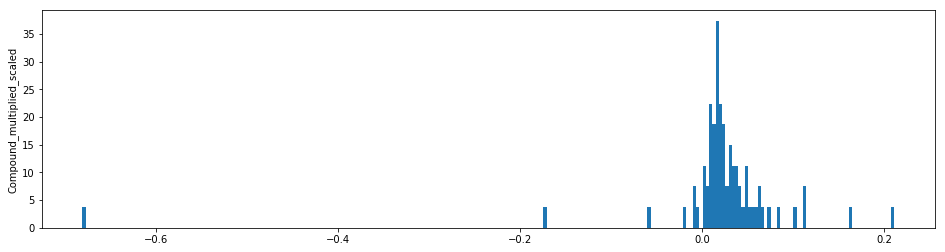

In [48]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] =16.0
fig_size[1] = 4.0

x = df_full['Compound_multiplied_scaled']
plt.hist(x, normed=True, bins=250)
plt.ylabel('Compound_multiplied_scaled');

### Save 'df_full' as excel file with the $cashtag as file name

In [49]:
# import xlsxwriter
# import os

writer_df = pd.ExcelWriter('df_full.xlsx', engine='xlsxwriter')
df_full.to_excel(writer_df)
writer_df.save()

os.rename('df_full.xlsx', '$AAL.xlsx') # UPDATE THE $CASHTAG BEFORE RUNNING THE CELL!!!!